<a href="https://colab.research.google.com/github/aadi-kanwar/MLOps/blob/main/churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
d = pd.read_csv("/content/drive/MyDrive/ML Ops/Churn_Modelling.csv")

d.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<Axes: >

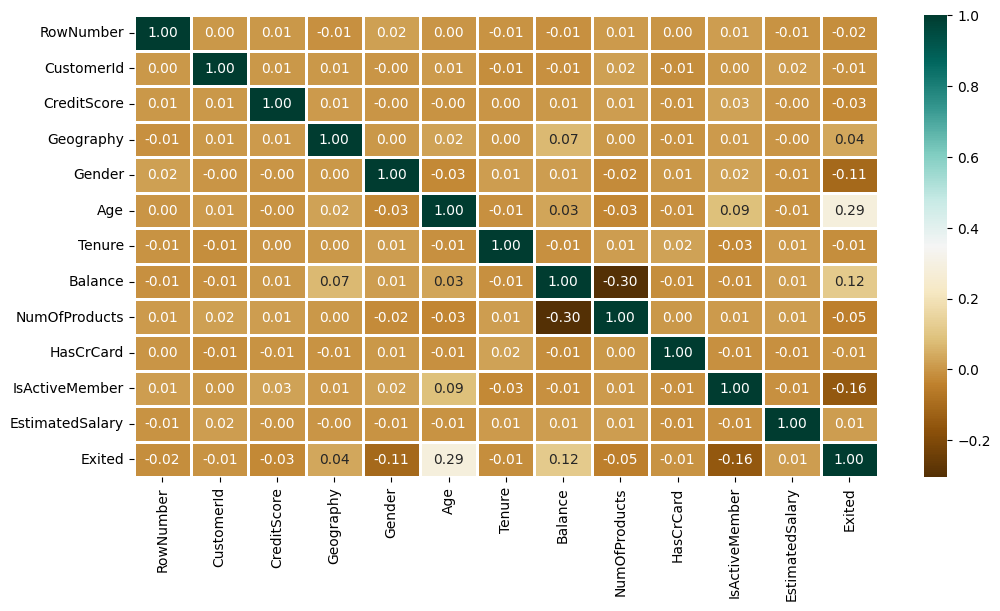

In [31]:
plt.figure(figsize=(12,6))
numerical_d = d.select_dtypes(include='number')

sns.heatmap(numerical_d.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

<ipython-input-22-37915a1b3373>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,index)
<ipython-input-22-37915a1b3373>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d[i])
<ipython-input-22-37915a1b3373>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new

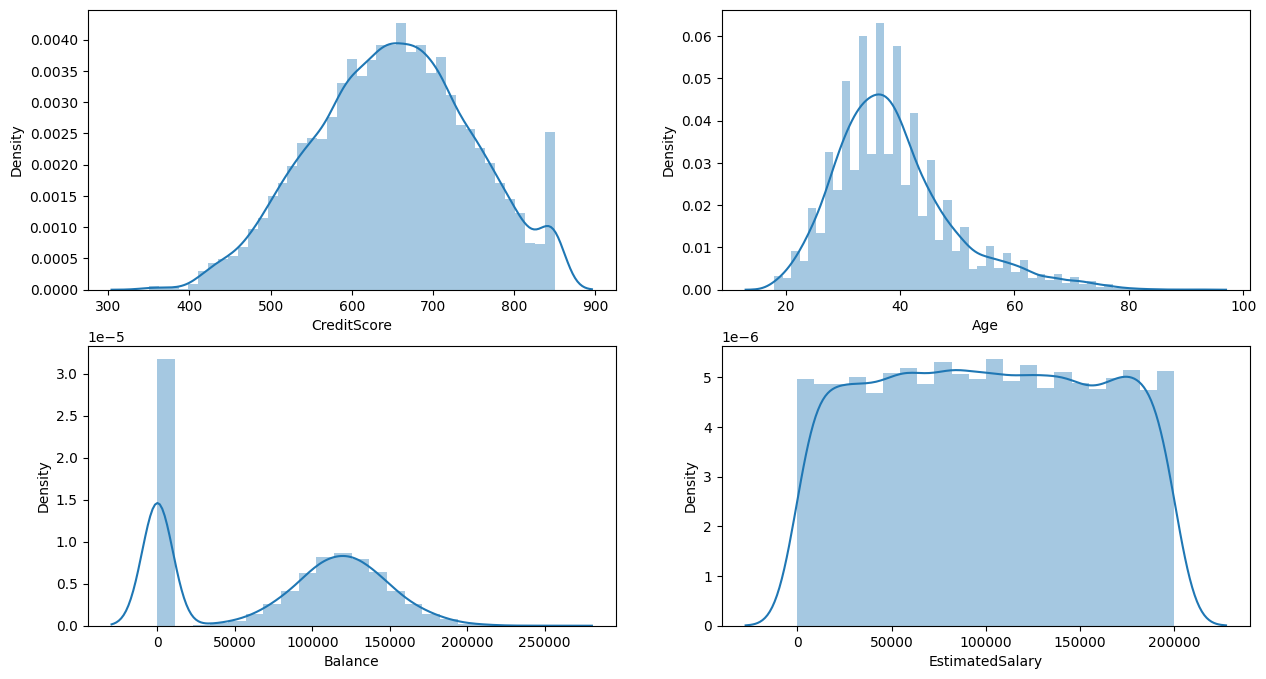

In [22]:
lis = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.subplots(figsize=(15, 8))
index = 1

for i in lis:
    plt.subplot(2,2,index)
    sns.distplot(d[i])
    index += 1

<ipython-input-23-da8555342df3>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, index)


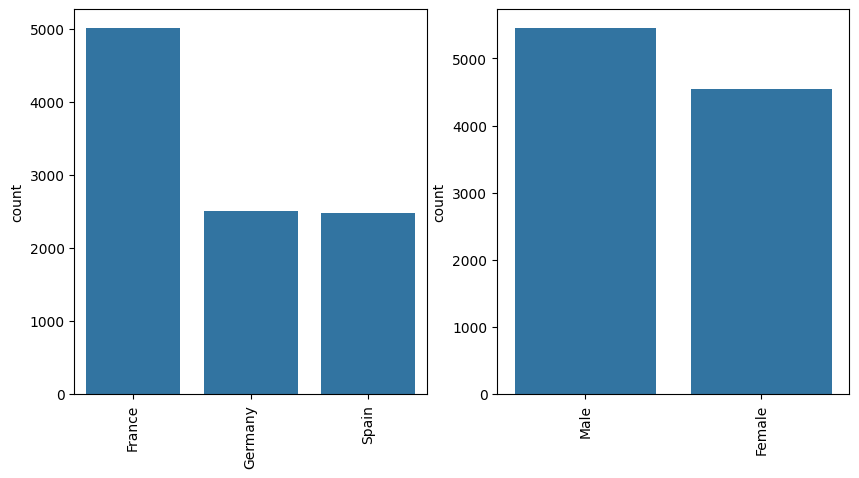

In [23]:
lis2 = ['Geography', 'Gender']
plt.subplots(figsize=(10, 5))
index = 1

for col in lis2:
    y = d[col].value_counts()
    plt.subplot(1, 2, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [24]:
d.isnull().any()

,0
RowNumber,False
CustomerId,False
Surname,False
CreditScore,False
Geography,False
Gender,False
Age,False
Tenure,False
Balance,False
NumOfProducts,False


In [25]:
le = LabelEncoder()
d['Geography'] = le.fit_transform(d["Geography"])
d['Gender'] = le.fit_transform(d["Gender"])

In [26]:
x = d.iloc[:,3:13].values
y = d.iloc[:,13:14].values

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [28]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

In [38]:
# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy score of ",clf.__class__.__name__,"=",
          100*metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score of  RandomForestClassifier = 84.5
Accuracy score of  KNeighborsClassifier = 82.45


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of  SVC = 86.15
Accuracy score of  LogisticRegression = 80.75


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
#Output

# Accuracy score of  RandomForestClassifier = 84.5
# Accuracy score of  KNeighborsClassifier = 82.45
# Accuracy score of  SVC = 86.15
# Accuracy score of  LogisticRegression = 80.75